In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Fetch data from DB

In [2]:
from data import get_enhanced_at_bats
from datetime import datetime

enhanced_at_bats = get_enhanced_at_bats(from_date = datetime(2015, 1, 1))
enhanced_at_bats

99.8% of at bats were statcast tracked...


events  \
game_date  game_pk home  team opponent at_bat batter pitcher              
2015-04-05 413661  False STL  CHC      1      572761 452657   field_out   
                                       2      518792 452657      double   
                                       3      407812 452657      single   
                                       4      425509 452657   strikeout   
                                       5      571431 452657   strikeout   
...                                                                 ...   
2023-08-27 716836  True  BAL  COL      61     663624 656234      single   
                                       62     623993 664875   field_out   
                                       67     669720 664875   strikeout   
                                       68     683002 664875   strikeout   
                                       69     624428 664875   field_out   

                                                                rhb    rhp  \
game_date  game_pk home  team opponent at_bat batter pitcher                 
2015-04-05 413661  False STL  CHC      1      572761 452657   False  False   
                                       2      518792 452657   False  False   
                                       3      407812 452657    True  False   
                                       4      425509 452657    True  False   
                                       5      571431 452657   False  False   
...                                                             ...    ...   
2023-08-27 716836  True  BAL  COL      61     663624 656234    True   True   
                                       62     623993 664875   False   True   
                                       67     669720 664875    True   True   
                                       68     683002 664875   False   True   
                                       69     624428 664875   False   True   

                                                                xBA  opp_sp  \
game_date  game_pk home  team opponent at_bat batter pitcher                  
2015-04-05 413661  False STL  CHC      1      572761 452657     NaN  452657   
                                       2      518792 452657     NaN  452657   
                                       3      407812 452657     NaN  452657   
                                       4      425509 452657     NaN  452657   
                                       5      571431 452657     NaN  452657   
...                                                             ...     ...   
2023-08-27 716836  True  BAL  COL      61     663624 656234   0.746  621389   
                                       62     623993 664875   0.071  621389   
                                       67     669720 664875     NaN  621389   
                                       68     683002 664875     NaN  621389   
                                       69     624428 664875   0.620  621389   

                                                             bats  hp_to_1b  \
game_date  game_pk home  team opponent at_bat batter pitcher                  
2015-04-05 413661  False STL  CHC      1      572761 452657     L      4.28   
                                       2      518792 452657     L      4.36   
                                       3      407812 452657     R      4.54   
                                       4      425509 452657     R      4.75   
                                       5      571431 452657     L      4.71   
...                                                           ...       ...   
2023-08-27 716836  True  BAL  COL      61     663624 656234     R      4.44   
                                       62     623993 664875     S      4.67   
                                       67     669720 664875     R      4.41   
                                       68     683002 664875     L      4.22   
                                       69     624428 664875     L      4.52   

                  

# Initialize classifier

In [3]:
from model import BTSBatterClassifier
from sklearn.linear_model import LogisticRegressionCV

log_reg = BTSBatterClassifier(LogisticRegressionCV(cv = 10, random_state = 57), at_bats_df = enhanced_at_bats, pkl_name = 'log_reg')

# Batter per game and per PA aggregations

In [4]:
log_reg.batter_per_game_agg()

G_last_50G  HG%_last_50G  xHG%_last_50G  \
game_date  game_pk batter                                            
2015-04-05 413661  407812           0          0.00       0.000000   
                   425509           0          0.00       0.000000   
                   425794           0          0.00       0.000000   
                   425877           0          0.00       0.000000   
                   445055           0          0.00       0.000000   
...                               ...           ...            ...   
2023-08-27 716836  676059          36          0.75       0.555556   
                   678662          50          0.68       0.540000   
                   683002          50          0.74       0.400000   
                   686668          50          0.52       0.140000   
                   696100           0          0.00       0.000000   

                           PA/G_last_50G  BIP/G_last_50G  H/G_last_50G  \
game_date  game_pk batter                                                
2015-04-05 413661  407812       0.000000        0.000000      0.000000   
                   425509       0.000000        0.000000      0.000000   
                   425794       0.000000        0.000000      0.000000   
                   425877       0.000000        0.000000      0.000000   
                   445055       0.000000        0.000000      0.000000   
...                                  ...             ...           ...   
2023-08-27 716836  676059       4.138889        3.027778      1.055556   
                   678662       4.260000        2.900000      1.020000   
                   683002       4.480000        3.080000      1.060000   
                   686668       3.640000        1.980000      0.560000   
                   696100       0.000000        0.000000      0.000000   

                           xH/G_last_50G  
game_date  game_pk batter                 
2015-04-05 413661  407812       0.000000  
                   425509       0.000000  
                   425794       0.000000  
                   425877       0.000000  
                   445055       0.000000  
...                                  ...  
2023-08-27 716836  676059       1.052972  
                   678662       1.037560  
                   683002       1.017420  
                   686668       0.551140  
                   696100       0.000000  

[339131 rows x 7 columns]

In [5]:
log_reg.batter_per_pa_agg()

PA_last_200PA  BIP/PA_last_200PA  H/PA_last_200PA  \
game_date  game_pk batter                                                      
2015-04-05 413661  407812              0           0.000000         0.000000   
                   424325              0           0.000000         0.000000   
                   425509              0           0.000000         0.000000   
                   425794              0           0.000000         0.000000   
                   425877              0           0.000000         0.000000   
...                                  ...                ...              ...   
2023-08-27 716836  676059            159           0.710692         0.245283   
                   678662            200           0.670000         0.235000   
                   683002            200           0.730000         0.245000   
                   686668            200           0.550000         0.160000   
                   696100              0           0.000000         0.000000   

                           xH/PA_last_200PA  
game_date  game_pk batter                    
2015-04-05 413661  407812          0.000000  
                   424325          0.000000  
                   425509          0.000000  
                   425794          0.000000  
                   425877          0.000000  
...                                     ...  
2023-08-27 716836  676059          0.247182  
                   678662          0.240375  
                   683002          0.237290  
                   686668          0.159665  
                   696100          0.000000  

[414005 rows x 4 columns]

# Pitcher and bullpen per BF aggregations

In [6]:
log_reg.pitcher_per_bf_agg()

BF_last_200BF  K%_last_200BF  BB%_last_200BF  \
game_date  game_pk pitcher                                                 
2015-04-05 413661  425794               0          0.000           0.000   
                   435400               0          0.000           0.000   
                   444468               0          0.000           0.000   
                   452657               0          0.000           0.000   
                   457435               0          0.000           0.000   
...                                   ...            ...             ...   
2023-08-27 716836  656234             200          0.175           0.095   
                   656427             200          0.235           0.105   
                   664875             200          0.235           0.110   
                   666974             200          0.215           0.055   
                   672335             200          0.205           0.115   

                            H/PA_last_200BF  xH/PA_last_200BF  
game_date  game_pk pitcher                                     
2015-04-05 413661  425794             0.000          0.000000  
                   435400             0.000          0.000000  
                   444468             0.000          0.000000  
                   452657             0.000          0.000000  
                   457435             0.000          0.000000  
...                                     ...               ...  
2023-08-27 716836  656234             0.270          0.264210  
                   656427             0.230          0.221250  
                   664875             0.200          0.179200  
                   666974             0.245          0.249730  
                   672335             0.230          0.207425  

[170081 rows x 5 columns]

In [7]:
log_reg.bullpen_per_bf_agg()

BF_last_200BF  K%_last_200BF  BB%_last_200BF  \
game_date  game_pk opponent                                                 
2015-04-05 413661  CHC                   0          0.000           0.000   
                   STL                   0          0.000           0.000   
2015-04-06 413649  LAA                   0          0.000           0.000   
                   SEA                   0          0.000           0.000   
           413650  ATL                   0          0.000           0.000   
...                                    ...            ...             ...   
2023-08-27 716834  PIT                 200          0.220           0.115   
           716835  PHI                 200          0.260           0.080   
                   STL                 200          0.170           0.075   
           716836  BAL                 200          0.245           0.085   
                   COL                 200          0.145           0.135   

                             H/PA_last_200BF  xH/PA_last_200BF  
game_date  game_pk opponent                                     
2015-04-05 413661  CHC                 0.000          0.000000  
                   STL                 0.000          0.000000  
2015-04-06 413649  LAA                 0.000          0.000000  
                   SEA                 0.000          0.000000  
           413650  ATL                 0.000          0.000000  
...                                      ...               ...  
2023-08-27 716834  PIT                 0.225          0.196820  
           716835  PHI                 0.215          0.215740  
                   STL                 0.280          0.254615  
           716836  BAL                 0.190          0.218240  
                   COL                 0.255          0.230165  

[39248 rows x 5 columns]

# Fit classifier

In [8]:
log_reg.fit_model(scale_features = True, perform_pca = True)

Initial 18 features: hp_to_1b, HG%_last_50G, xHG%_last_50G, PA/G_last_50G, BIP/G_last_50G, H/G_last_50G, xH/G_last_50G, BIP/PA_last_200PA, H/PA_last_200PA, xH/PA_last_200PA, K%_last_200BF, BB%_last_200BF, H/PA_last_200BF, xH/PA_last_200BF, K%_last_200BF_bullpen, BB%_last_200BF_bullpen, H/PA_last_200BF_bullpen, xH/PA_last_200BF_bullpen
PCA: # of features reduced from 18 to 14
Score on training data: 0.647
Score on testing data: 0.648


# Simulate results on test data

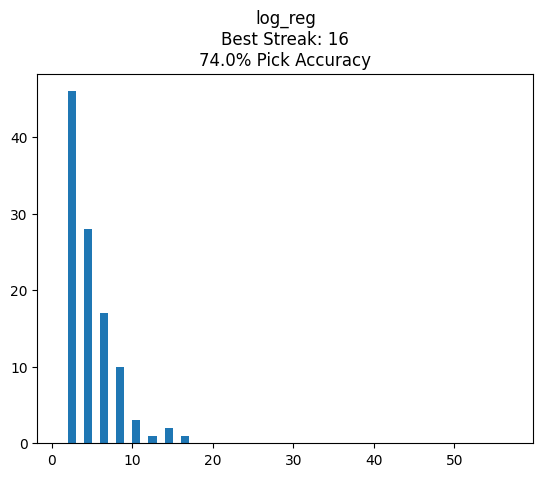

In [9]:
log_reg.simulate_results()

# Get predictions for today

In [10]:
todays_predictions = log_reg.todays_predictions()
todays_predictions

GET https://www.mlb.com/apps/beat-the-streak/game/json/units.json (200) 0.18s
GET https://www.mlb.com/apps/beat-the-streak/game/json/squads.json (200) 0.13s
GET https://www.mlb.com/apps/beat-the-streak/game/json/players.json (200) 0.15s


lineup  \
game_date           game_pk home  team opponent batter           
2023-08-28 20:35:00 716812  False ATL  COL      660670       0   
2023-08-28 19:40:00 716809  False SD   STL      673490       0   
2023-08-28 19:05:00 716818  False TEX  NYM      608369       0   
2023-08-28 19:40:00 716809  False SD   STL      665487       0   
                                                593428       0   
...                                                        ...   
                            True  STL  SD       600301       0   
2023-08-28 19:05:00 716814  False HOU  BOS      682073       0   
2023-08-28 19:35:00 716813  True  MIN  CLE      608336       0   
                            False CLE  MIN      595956       0   
2023-08-28 19:05:00 716814  False HOU  BOS      455117       0   

                                                                      name  \
game_date           game_pk home  team opponent batter                       
2023-08-28 20:35:00 716812  False ATL  COL      660670    Ronald Acuña Jr.   
2023-08-28 19:40:00 716809  False SD   STL      673490        Ha-Seong Kim   
2023-08-28 19:05:00 716818  False TEX  NYM      608369        Corey Seager   
2023-08-28 19:40:00 716809  False SD   STL      665487  Fernando Tatis Jr.   
                                                593428     Xander Bogaerts   
...                                                                    ...   
                            True  STL  SD       600301       Taylor Motter   
2023-08-28 19:05:00 716814  False HOU  BOS      682073       David Hensley   
2023-08-28 19:35:00 716813  True  MIN  CLE      608336          Joey Gallo   
                            False CLE  MIN      595956       Cam Gallagher   
2023-08-28 19:05:00 716814  False HOU  BOS      455117    Martín Maldonado   

                                                       bats  opp_sp  \
game_date           game_pk home  team opponent batter                
2023-08-28 20:35:00 716812  False ATL  COL      660670    R  596295   
2023-08-28 19:40:00 716809  False SD   STL      673490    R  425794   
2023-08-28 19:05:00 716818  False TEX  NYM      608369    L  656731   
2023-08-28 19:40:00 716809  False SD   STL      665487    R  425794   
                                                593428    R  425794   
...                                                     ...     ...   
                            True  STL  SD       600301    R  605483   
2023-08-28 19:05:00 716814  False HOU  BOS      682073    R  519242   
2023-08-28 19:35:00 716813  True  MIN  CLE      608336    L  675540   
                            False CLE  MIN      595956    R  628317   
2023-08-28 19:05:00 716814  False HOU  BOS      455117    R  519242   

                                                            opp_sp_name  \
game_date           game_pk home  team opponent batter                    
2023-08-28 20:35:00 716812  False ATL  COL      660670    Austin Gomber   
2023-08-28 19:40:00 716809  False SD   STL      673490  Adam Wainwright   
2023-08-28 19:05:00 716818  False TEX  NYM      608369     Tylor Megill   
2023-08-28 19:40:00 716809  False SD   STL      665487  Adam Wainwright   
                                                593428  Adam Wainwright   
...                                                                 ...   
                            True  STL  SD       600301      Blake Snell   
2023-08-28 19:05:00 716814  False HOU  BOS      682073       Chris Sale   
2023-08-28 19:35:00 716813  True  MIN  CLE      608336    Xzavion Curry   
                            False CLE  MIN      595956      Kenta Maeda   
2023-08-28 19:05:00 716814  False HOU  BOS      455117       Chris Sale   

                                                       opp_sp_throws  \
game_date           game_pk home  team opponent batter                 
2023-08-28 20:35:00 716812  False ATL  COL      660670             L   
2023-08-28 19:40:00 716809  False SD   STL      673490            